In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
import networkx as nx
from src.environment import EnvironmentNetwork, Environment
from src.runner import Runner
from src.agent import NetworkAgent, Agent
from src.helpers import edges_to_remove_neighbourhood, what_neighbourhood, what_coordinates, what_informality
import random
import json

Test time

In [9]:
start = time.time()
Environment(seed, parameters, neighbourhood_data, age_distribution_per_ward)
end = time.time()
print(end - start)

0.07083606719970703


In [10]:
start = time.time()
EnvironmentNetwork(seed, parameters, neighbourhood_data, age_distribution_per_ward)
end = time.time()
print(end - start)

0.060355424880981445


# Try to improve network creation

In [2]:

data_folder = 'measurement/baseline/'

# load parameters
with open('parameters.json') as json_file:
    parameters = json.load(json_file)

# load neighbourhood data
with open('neighbourhood_data.json') as json_file:
    neighbourhood_data = json.load(json_file)

# load age data
age_distribution = pd.read_csv('age_dist.csv', sep=';', index_col=0)
age_distribution_per_ward = dict(age_distribution.transpose())

In [3]:
seed = 0

In [4]:
np.random.seed(seed)
random.seed(seed)

#self.parameters = parameters

# sort data
nbd_values = [x[1] for x in neighbourhood_data]
nbd_keys = [x[0] for x in neighbourhood_data]
population_per_neighbourhood = [x['Population'] for x in nbd_values]

# correct the population in neighbourhoods to be proportional to number of agents
correction_factor = sum(population_per_neighbourhood) / parameters["number_of_agents"]
corrected_populations = [round(x / correction_factor) for x in population_per_neighbourhood]

# only count neighbourhoods that then have an amount of people bigger than 0
indices_big_neighbourhoods = [i for i, x in enumerate(corrected_populations) if x > 0]
corrected_populations_final = [x for i, x in enumerate(corrected_populations) if x > 0]

# calculate correct density per district
corrected_density_per_neighbourhood = [x['Density'] for i, x in enumerate(nbd_values) if
                                       i in indices_big_neighbourhoods]
corrected_density_per_neighbourhood = [(float(i) / max(corrected_density_per_neighbourhood)) for i in
                  corrected_density_per_neighbourhood]

In [5]:
### old method
# 1 create a cave network that has max nodes equal to the biggest neighbourhoods
# 2 find cliques and associate with neighbourhoods that are big enough
# 3 reduce the amount of nodes in each clique to reflect the size of the neighbourhood

### new method
# 1 create neighbourhoods based on amount of agents in model

### what if density of the neighbourhood just increases the 

In [39]:
# agents = []
# district_graphs = []
# city_graph = nx.Graph()

# num_agents = corrected_populations_final[0]
# idx = indices_big_neighbourhoods[0]

# district_list = []
# district_code = neighbourhood_data[idx][0]
# coordinates = what_coordinates(district_code, neighbourhood_data)
# informality = what_informality(district_code, neighbourhood_data)
# density = corrected_density_per_neighbourhood[idx]

# age_categories = np.random.choice(age_distribution_per_ward[district_code].index,
#                                           size=num_agents,
#                                           replace=True,
#                                           p=age_distribution_per_ward[district_code].values)

# # add agents to neighbourhood
# for a in range(num_agents):
#     district_list.append(Agent(a, 's', 
#                                parameters["probability_transmission"], 
#                                parameters["probability_susceptible"], 
#                                parameters["probability_to_travel"], 
#                                coordinates, 
#                                district_code, 
#                                age_categories[a],
#                                informality,
#                                parameters['probability_critical'][age_categories[a]],
#                                parameters['probability_to_die'][age_categories[a]]
#                               ))

# # create a barabasi albert graph for the ward
# nodes = len(district_list)
# new_edges = 2
# NG = nx.barabasi_albert_graph(nodes, new_edges, seed=0) 

# edges = list(NG.edges)
# # reduce the amount of edges in the district depending on its empirical density
# for e in edges_to_remove_neighbourhood(edges, density, list(NG.nodes)):
#     NG.remove_edge(e[0], e[1])

# # add the district agents to the agent list
# agents.append(district_list)

# # add network to city graph
# city_graph = nx.disjoint_union(city_graph, NG)

In [5]:
np.random.seed(seed)
random.seed(seed)

self.parameters = parameters

# sort data
nbd_values = [x[1] for x in neighbourhood_data]
nbd_keys = [x[0] for x in neighbourhood_data]
population_per_neighbourhood = [x['Population'] for x in nbd_values]

# correct the population in neighbourhoods to be proportional to number of agents
correction_factor = sum(population_per_neighbourhood) / parameters["number_of_agents"]
corrected_populations = [round(x / correction_factor) for x in population_per_neighbourhood]

# only count neighbourhoods that then have an amount of people bigger than 0
indices_big_neighbourhoods = [i for i, x in enumerate(corrected_populations) if x > 0]
corrected_populations_final = [x for i, x in enumerate(corrected_populations) if x > 0]

# calculate correct density per district
corrected_density_per_neighbourhood = [x['Density'] for i, x in enumerate(nbd_values) if
                                       i in indices_big_neighbourhoods]
corrected_density_per_neighbourhood = [(float(i) / max(corrected_density_per_neighbourhood)) for i in
                  corrected_density_per_neighbourhood]

agents = []
district_graphs = []
city_graph = nx.Graph()
agent_name = 0

for num_agents, idx in zip(corrected_populations_final, indices_big_neighbourhoods):
    district_list = []
    district_code = neighbourhood_data[idx][0]
    coordinates = what_coordinates(district_code, neighbourhood_data)
    informality = what_informality(district_code, neighbourhood_data)
    density = corrected_density_per_neighbourhood[idx]

    age_categories = np.random.choice(age_distribution_per_ward[district_code].index,
                                              size=num_agents,
                                              replace=True,
                                              p=age_distribution_per_ward[district_code].values)

    # add agents to neighbourhood
    for a in range(num_agents):
        agent_name += 1
        district_list.append(Agent(agent_name, 's', 
                                   parameters["probability_transmission"], 
                                   parameters["probability_susceptible"], 
                                   parameters["probability_to_travel"], 
                                   coordinates, 
                                   district_code, 
                                   age_categories[a],
                                   informality,
                                   parameters['probability_critical'][age_categories[a]],
                                   parameters['probability_to_die'][age_categories[a]]
                                  ))

    # create a barabasi albert graph for the ward
    nodes = len(district_list)
    if nodes <= 4:
        new_edges = nodes - 1
    else: 
        new_edges = 4
    NG = nx.barabasi_albert_graph(nodes, new_edges, seed=0) 

    edges = list(NG.edges)
    # reduce the amount of edges in the district depending on its empirical density
    for e in edges_to_remove_neighbourhood(edges, density, list(NG.nodes)):
        NG.remove_edge(e[0], e[1])

    # add the district agents to the agent list
    agents.append(district_list)

    # add network to city graph
    city_graph = nx.disjoint_union(city_graph, NG)

In [6]:
self.agents = [y for x in agents for y in x]

# add agent to the network structure
for idx, agent in enumerate(self.agents):
    self.network.nodes[idx]['agent'] = agent

[[s Agent1, s Agent2, s Agent3, s Agent4],
 [s Agent5, s Agent6, s Agent7, s Agent8],
 [s Agent9, s Agent10, s Agent11],
 [s Agent12, s Agent13, s Agent14, s Agent15],
 [s Agent16, s Agent17, s Agent18],
 [s Agent19, s Agent20, s Agent21, s Agent22, s Agent23],
 [s Agent24, s Agent25, s Agent26, s Agent27],
 [s Agent28, s Agent29, s Agent30, s Agent31],
 [s Agent32, s Agent33, s Agent34, s Agent35],
 [s Agent36, s Agent37, s Agent38, s Agent39],
 [s Agent40, s Agent41, s Agent42, s Agent43, s Agent44],
 [s Agent45, s Agent46, s Agent47, s Agent48, s Agent49],
 [s Agent50, s Agent51, s Agent52, s Agent53, s Agent54, s Agent55],
 [s Agent56, s Agent57, s Agent58, s Agent59, s Agent60],
 [s Agent61, s Agent62, s Agent63],
 [s Agent64, s Agent65, s Agent66, s Agent67, s Agent68, s Agent69],
 [s Agent70, s Agent71, s Agent72, s Agent73, s Agent74],
 [s Agent75, s Agent76, s Agent77],
 [s Agent78, s Agent79, s Agent80, s Agent81, s Agent82, s Agent83, s Agent84],
 [s Agent85, s Agent86, s Ag

In [7]:
city_graph.edges

EdgeView([(0, 3), (6, 7), (8, 10), (11, 14), (15, 17), (19, 22), (24, 26), (29, 30), (33, 34), (36, 38), (40, 43), (44, 48), (47, 48), (49, 53), (51, 54), (52, 53), (53, 54), (55, 59), (60, 62), (65, 67), (72, 73), (74, 76), (77, 81), (77, 83), (81, 82), (86, 88), (87, 88), (87, 89), (88, 89), (90, 92), (95, 96), (97, 100), (102, 104), (105, 109), (106, 109), (110, 114), (115, 117), (119, 122), (121, 122), (125, 127), (129, 132), (135, 137), (140, 142), (144, 148), (145, 148), (146, 148), (149, 153), (150, 153), (152, 153), (156, 158), (157, 158), (159, 162), (160, 162), (163, 165), (164, 165), (166, 168), (169, 172), (170, 172), (171, 172), (173, 177), (174, 177), (176, 177), (178, 180), (181, 183), (182, 183), (184, 188), (191, 193), (192, 193), (195, 198), (196, 198), (197, 198), (199, 202), (203, 207), (205, 207), (206, 207), (209, 210), (213, 214), (216, 218), (217, 218), (220, 221), (222, 224), (223, 224), (225, 227), (229, 230), (231, 234), (236, 238), (240, 242), (244, 246), (2

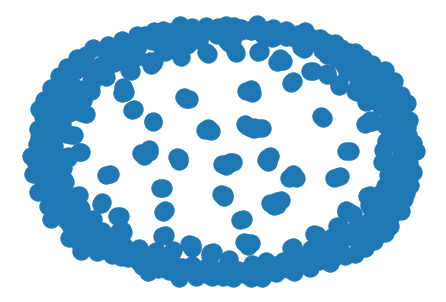

In [8]:
nx.draw(city_graph)

In [70]:
np.mean(nx.degree(city_graph))

124.09274193548387

In [71]:
np.std(nx.degree(city_graph))

159.62527776689757

In [72]:
len(city_graph.nodes)

496

In [73]:
len(city_graph.edges)

170

In [74]:
nx.density(city_graph)

0.0013848159009449332

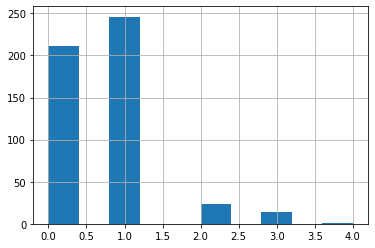

In [75]:
pd.Series([x[1] for x in nx.degree(city_graph)]).hist()